# Alfredo Bernal Luna

# CASE STUDY 1. Are GOOG stocks a random walk?  

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error # MSE 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## GOOGL - June 16, 2023 to June 16, 2024

In [143]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-16,126.699997,126.699997,123.790001,124.059998,123.918983,56686800
1,2023-06-20,123.535004,125.175003,122.830002,123.849998,123.709221,22698000
2,2023-06-21,123.235001,123.410004,120.860001,121.260002,121.122169,22612000
3,2023-06-22,120.660004,123.934998,119.599998,123.870003,123.729202,20781900
4,2023-06-23,122.040001,123.440002,121.860001,123.019997,122.880165,29542900


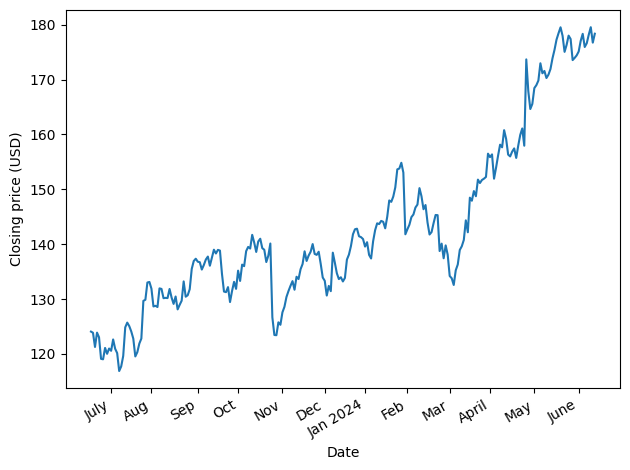

In [144]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [10, 30, 53, 73, 95, 116, 136, 157, 178, 198, 220, 242], 
    ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2024', 'Feb', 'Mar', 'April', 'May', 'June'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('GOOG_stockPriceJune2023_2024.png', dpi=300)

## We can see a trend in the data as the closing price is increasing over time; therefore, we do not have a stationary process.

In [145]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: -0.5214005072339035
p-value: 0.8877722418900675


# IMPORTANT OBSERVATIONS

Does every non stationary time series can be converted to a stationary with mathematical transformations? If true, is there a theorem that actually proofs this?

Not every non-stationary time series can be converted to a stationary series using mathematical transformations, but many common types of non-stationary series can be made stationary. The ability to transform a non-stationary time series into a stationary one often depends on the nature of the non-stationarity. Here are some key concepts and theorems related to this topic:

### Types of Non-Stationarity and Transformations

1. **Deterministic Trends**:
   - **Transformation**: Detrending can often remove deterministic trends, making the series stationary.
   - **Example**: A time series with a linear trend \( y_t = \beta_0 + \beta_1 t + \epsilon_t \) can be made stationary by subtracting the trend \( \beta_0 + \beta_1 t \).

2. **Stochastic Trends**:
   - **Transformation**: Differencing can remove stochastic trends. A time series with a unit root (integrated of order one, \( I(1) \)) can be made stationary by taking the first difference.
   - **Example**: A random walk \( y_t = y_{t-1} + \epsilon_t \) can be made stationary by differencing: \( \Delta y_t = y_t - y_{t-1} = \epsilon_t \).

3. **Seasonality**:
   - **Transformation**: Seasonal differencing can remove seasonal effects, making the series stationary.
   - **Example**: Monthly sales data with seasonality can be differenced by 12 periods to remove seasonal effects.

### Key Theorems and Concepts

1. **Wold's Decomposition Theorem**:
   - **Statement**: Any stationary time series can be represented as the sum of two orthogonal components: a deterministic component and a stochastic component.
   - **Implication**: For stationary series, we can always decompose the series into these components, but it doesn't directly address non-stationary series.

2. **Granger Representation Theorem**:
   - **Statement**: If two or more time series are cointegrated, they can be represented with an error correction model (ECM) that captures the long-term relationship while differencing can remove non-stationarity in the individual series.
   - **Implication**: This theorem suggests that certain types of non-stationary series, specifically those that are cointegrated, can be transformed into a form that reveals a stationary relationship.

### Practical Transformations

- **Logarithmic Transformation**: Can stabilize variance and make a series more stationary.
  - **Example**: \( y_t \) with exponential growth can be transformed using \( \log(y_t) \).

- **Box-Cox Transformation**: A family of power transformations that can stabilize variance and make a series more stationary.
  - **Example**: The Box-Cox transformation is \( y_t^{(\lambda)} = \frac{y_t^\lambda - 1}{\lambda} \) for \( \lambda \neq 0 \).

### Limitations

While many non-stationary time series can be transformed to stationarity using the methods described, there are exceptions:

- **Complex Non-Stationarity**: Some series may exhibit complex forms of non-stationarity that are not easily transformed.
- **Structural Breaks**: Series with structural breaks may require more sophisticated methods to achieve stationarity.

### Summary

- **Many but Not All**: Many non-stationary time series can be transformed to stationary series using methods like differencing, detrending, and applying logarithmic or Box-Cox transformations.
- **Key Theorems**: While Wold's decomposition and Granger representation theorems provide theoretical foundations for understanding time series behavior, they do not guarantee that all non-stationary series can be made stationary.
- **Practical Consideration**: The success of transforming a non-stationary series to stationary depends on the specific characteristics of the series and the type of non-stationarity it exhibits.

### Conclusion

While there isn't a universal theorem that states every non-stationary time series can be transformed into a stationary one, many types of non-stationary series commonly encountered in practice can be made stationary using appropriate transformations. For a deeper understanding, examining econometric texts such as Hamilton's "Time Series Analysis" or Enders' "Applied Econometric Time Series" is recommended.

# As per above observation on stochastic trends, let's difference our data to see if that makes it stationary

In [146]:
diff_close = np.diff(df['Close'], n=1)

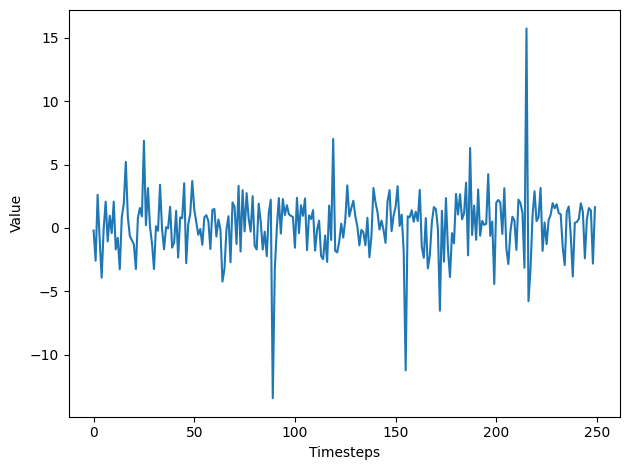

In [147]:
fig, ax = plt.subplots()

ax.plot(diff_close)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('diff_GOOGL_Random_Walk.png', dpi=300)

In [148]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -17.07518867174783
p-value: 7.775610029106698e-30


Since we have an ADF of -17.07 and a p-value < 0.05, we conclude that we have a stationary process. Now we can plot the ACF function and see if there is autocorrelation:

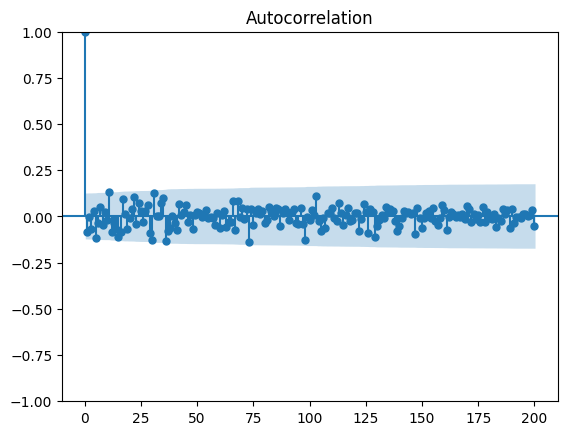

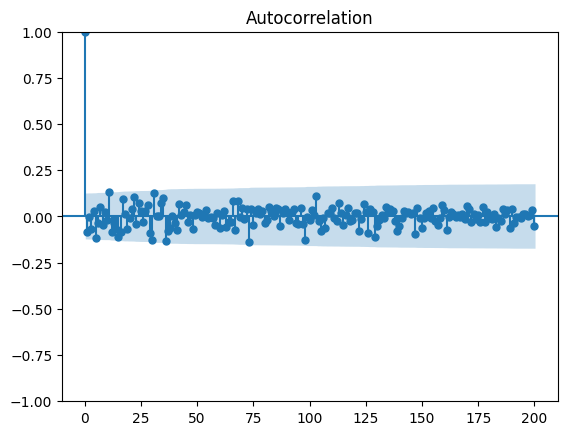

In [149]:
plot_acf(diff_close, lags=200)

## There are no significant autocorrelation coefficients after lag 0. It means that the stationary process is completely random and can therefore be described as white noise. Therefore, we can conclude that the closing price of GOOGL can be approximated by a random walk process.

Taking the first difference makes the series stationary, and its ACF plot shows no autocorrelation, meaning that it is purely random.

# Forecasting in a long horizon

In [150]:
split_data = pd.DataFrame({'date': df['Date'], 'value': df['Close']})

train = split_data[:202]
test = split_data[202:]

In [151]:
split_data.head()

,date,value
0,2023-06-16,124.059998
1,2023-06-20,123.849998
2,2023-06-21,121.260002
3,2023-06-22,123.870003
4,2023-06-23,123.019997


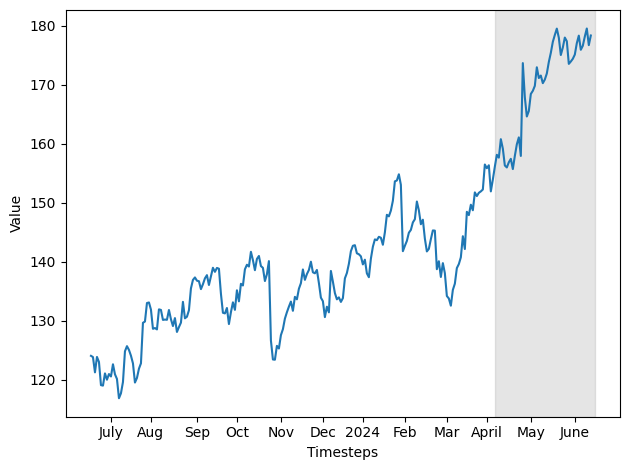

In [152]:
fig, ax = plt.subplots()

ax.plot(split_data['date'], split_data['value'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(202, 252, color='#808080', alpha=0.2)

plt.xticks(
    [10, 30, 53, 73, 95, 116, 136, 157, 178, 198, 220, 242], 
    ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2024', 'Feb', 'Mar', 'April', 'May', 'June'])

plt.tight_layout()

plt.savefig('GOOG_stockPriceJune2023_2024_Train_Tst.png', dpi=300)

Forecasting the mean is fairly straightforward. We’ll simply calculate the mean of the train set and say that the next 200 timesteps will be equal to that value. Here, we’ll create a new column pred_mean that will hold the historical mean as a prediction

In [153]:
mean = np.mean(train['value'])

test.loc[:, 'pred_mean'] = mean
test.head()

,date,value,pred_mean
202,2024-04-08,156.139999,136.313762
203,2024-04-09,158.139999,136.313762
204,2024-04-10,157.660004,136.313762
205,2024-04-11,160.789993,136.313762
206,2024-04-12,159.190002,136.313762


# Function that computes the MAPE metric

In [154]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [155]:
mape_hist_mean = mape(test['value'], test['pred_mean'])
mape_hist_mean

19.400091471222105

# Visualization of our forecast

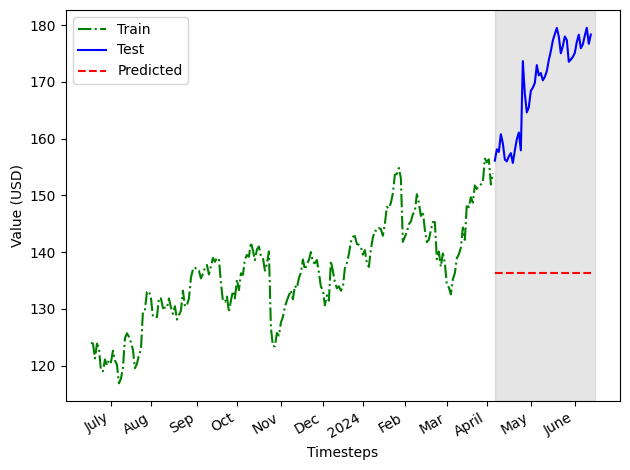

In [156]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['value'], 'g-.', label='Train')
ax.plot(test['date'], test['value'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value (USD)')
ax.axvspan(202, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    [10, 30, 53, 73, 95, 116, 136, 157, 178, 198, 220, 242], 
    ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2024', 'Feb', 'Mar', 'April', 'May', 'June'])

fig.autofmt_xdate() # To slightly rotate dates
plt.tight_layout()  # To remove any excess white space around the figure

plt.savefig('VisualizationMapeForecastGOOG.png', dpi=300)

# Predicting with last known value

In [157]:
last_value = train.iloc[-1].value

In [158]:
test['pred_last'] = last_value

In [159]:
test.head()

,date,value,pred_mean,pred_last
202,2024-04-08,156.139999,136.313762,153.940002
203,2024-04-09,158.139999,136.313762,153.940002
204,2024-04-10,157.660004,136.313762,153.940002
205,2024-04-11,160.789993,136.313762,153.940002
206,2024-04-12,159.190002,136.313762,153.940002


In [160]:
mape_hist_mean = mape(test['value'], test['pred_last'])
mape_hist_mean

8.97800860665549

# Visualization of our forecast

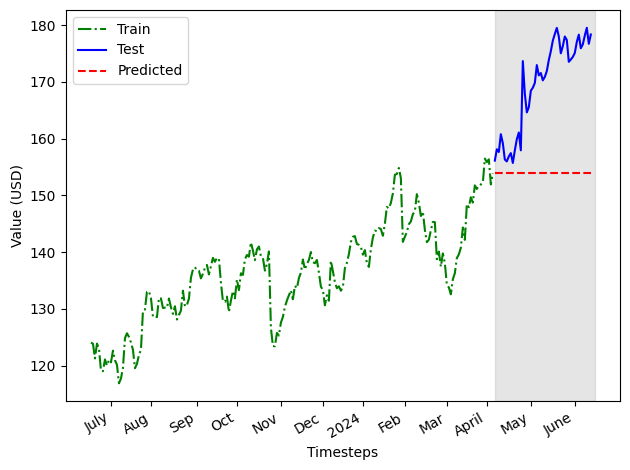

In [161]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['value'], 'g-.', label='Train')
ax.plot(test['date'], test['value'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value (USD)')
ax.axvspan(202, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    [10, 30, 53, 73, 95, 116, 136, 157, 178, 198, 220, 242], 
    ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2024', 'Feb', 'Mar', 'April', 'May', 'June'])

fig.autofmt_xdate() # To slightly rotate dates
plt.tight_layout()  # To remove any excess white space around the figure

plt.savefig('VisualizationMapeForecastGOOG_lstVal.png', dpi=300)

# Predicting with the drift method

In [162]:
initial_value = train.iloc[0].value
initial_value

124.059998

In [163]:
deltaX = 201 - 1
deltaY = last_value - initial_value
drift = deltaY / deltaX
print(drift)

0.14940002


The drift method simply states that the value of our forecast is linearly dependent on the timestep, the value of the drift, and the initial value of our random walk, as expressed in the following equation:


$$\begin{align}
        forecast = drift * timestep + y_{i} 
\end{align}$$

Then we simply multiply each timestep by the drift to get our forecast values.
Finally, we assign them to the pred_drift column of test:

In [164]:
x_vals = np.arange(202, 251, 1)
pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,date,value,pred_mean,pred_last,pred_drift
202,2024-04-08,156.139999,136.313762,153.940002,30.178804
203,2024-04-09,158.139999,136.313762,153.940002,30.328204
204,2024-04-10,157.660004,136.313762,153.940002,30.477604
205,2024-04-11,160.789993,136.313762,153.940002,30.627004
206,2024-04-12,159.190002,136.313762,153.940002,30.776404


With all three methods, we can now visualize what our forecasts look like against the actual values of the test set:

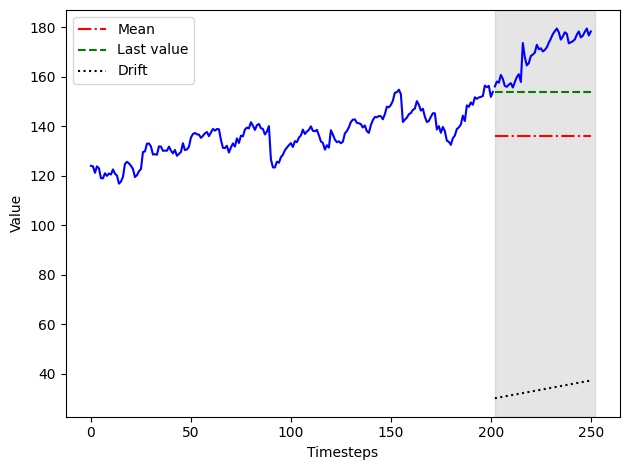

In [165]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(202, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('forecast_RandomWalkExample.png', dpi=300)

# Compute the MSE to compare numerically the predictions

In [166]:
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

1168.1008994130432 308.17579245471865 18468.558878653315


# Bar graphs of the MSE's for the different forecasts

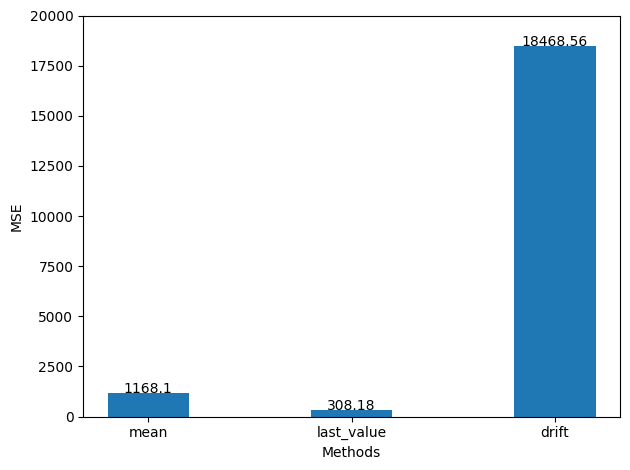

In [167]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 20000)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('BarChartMSEsRandomWalk.png', dpi=300)

# Conclusion

Forecasting a random walk on a long horizon does not make sense. Since the future value is dependent on the past value plus a random number, the randomness portion is magnified in a long horizon where many random numbers are added over the course of many timesteps

# Forecasting the next timestep

Since the future value of a random walk is always the past value plus white noise, this forecast should only be off by a random number

In [168]:
df_shift = df.shift(periods=1)

df_shift.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,None,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-16,126.699997,126.699997,123.790001,124.059998,123.918983,56686800.0
2,2023-06-20,123.535004,125.175003,122.830002,123.849998,123.709221,22698000.0
3,2023-06-21,123.235001,123.410004,120.860001,121.260002,121.122169,22612000.0
4,2023-06-22,120.660004,123.934998,119.599998,123.870003,123.729202,20781900.0


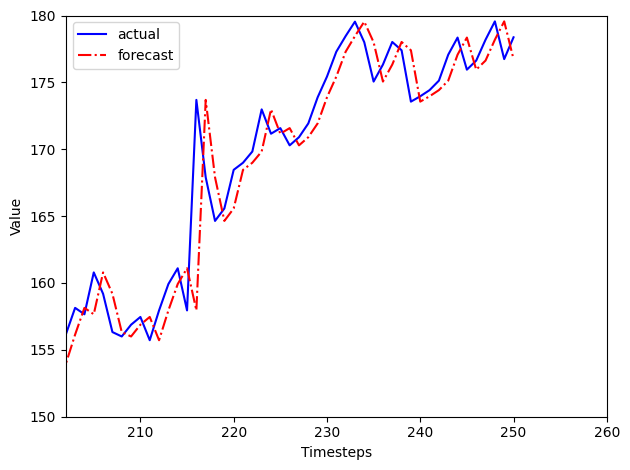

<Figure size 640x480 with 0 Axes>

In [186]:
fig, ax = plt.subplots()
ax.plot(df['Close'], 'b-', label='actual')
ax.plot(df_shift['Close'], 'r-.', label='forecast')
ax.legend(loc=2)
ax.set_xlim(202, 260)
ax.set_ylim(150, 180)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()
plt.show()
plt.savefig('ForecastNextTimeStepMSEsRandomWalk.png', dpi=300)

In [187]:
mse_one_step = mean_squared_error(test['value'], df_shift['Close'][202:])
print(mse_one_step)

9.03812724371937
